In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models.word2vec import Word2Vec

%matplotlib inline

In [2]:
%%time
hun_w2v = Word2Vec.load('models/hun_word2vec')

CPU times: user 2.63 s, sys: 464 ms, total: 3.09 s
Wall time: 3.09 s


In [3]:
%%time
en_w2v = Word2Vec.load('models/en_word2vec')

CPU times: user 7.95 s, sys: 2.12 s, total: 10.1 s
Wall time: 10.1 s


In [4]:
def display_closestwords_tsnescatterplot(model, word, siz=(10, 10)):
    plt.rcParams['figure.figsize'] = siz
    arr = np.empty((0,200), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points')
    plt.xlim(x_coords.min()-50, x_coords.max()+50)
    plt.ylim(y_coords.min()-50, y_coords.max()+50)
    plt.show()

In [5]:
en_w2v.wv.get_vector('apple')

array([-2.25223231,  1.79967296,  0.52052546,  0.69880956, -0.96674138,
       -0.43120316, -0.51081914, -0.09760351, -1.87675786,  3.64533353,
        2.04445052,  0.33419853,  0.10876931, -0.0199236 , -1.3290658 ,
       -0.54760391,  0.33101451, -2.3777597 , -2.1069591 , -0.81782573,
        0.02968018, -1.16042852, -3.79935431, -0.02941807,  1.29824412,
       -0.19951613, -4.38423109, -1.76739872,  2.4510076 , -1.06378841,
        1.28968644, -1.76569963,  0.23196875,  2.89225411,  4.28000498,
        1.76823294,  1.62883067, -4.31515646,  1.15561104,  0.52216232,
        1.27078235,  0.79041451, -2.0780139 ,  0.41034013,  2.33784413,
        1.22297597,  3.73160815,  0.91349596, -0.06935301, -0.30641589,
       -0.69564182,  3.40794444,  0.32902223, -1.01418376,  1.77297831,
        1.24038219, -0.16458292,  0.12135817, -3.34925008, -2.00667858,
        0.89003199,  4.39943647,  0.18678869, -0.66747308, -4.27233362,
       -4.87201881,  0.98000288,  2.27560258,  0.03459861, -4.38

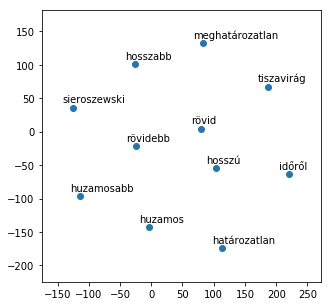

In [6]:
display_closestwords_tsnescatterplot(hun_w2v.wv, 'rövid', (5, 5))

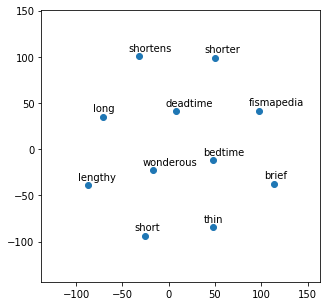

In [7]:
display_closestwords_tsnescatterplot(en_w2v.wv, 'short', (5, 5))

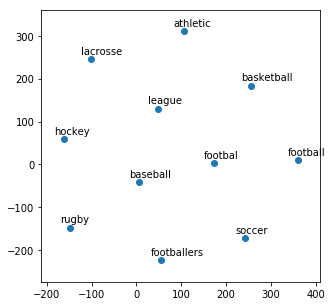

In [91]:
display_closestwords_tsnescatterplot(en_w2v.wv, 'football', (5, 5))

## Check if this really captures the meaning of the words!
#### With vector addition
$$X - B = C - D$$
$$X = C - D + B$$
so 
$$ carrots - carrot = cats - cat$$
$$ carrots = cats + carrot - cat$$

All similarity is cosine similarity:
$$d(a,b) = \frac{a \cdot b}{||a|| \cdot ||b||}$$

In [29]:
v1 = en_w2v.wv.get_vector('apple')
v2 = en_w2v.wv.get_vector('carrot')

print(np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
en_w2v.wv.similarity('apple', 'carrot')

0.324072


0.32407220489493499

In [9]:
en_w2v.wv.most_similar(positive=['cats', 'carrot'], negative=['cat'])

[('carrots', 0.5664988160133362),
 ('celery', 0.5056933164596558),
 ('blueberries', 0.49498215317726135),
 ('thistles', 0.4908701777458191),
 ('rabbits', 0.4875614643096924),
 ('marshmallows', 0.4817712604999542),
 ('turnip', 0.4775334298610687),
 ('parsnip', 0.47744834423065186),
 ('cabbage', 0.47217679023742676),
 ('cabbages', 0.4663088023662567)]

In [10]:
en_w2v.wv.most_similar(positive=['cats', 'mouse'], negative=['cat'])

[('mice', 0.6713122725486755),
 ('rabbits', 0.6096656322479248),
 ('hamsters', 0.5885499119758606),
 ('rodents', 0.5712479948997498),
 ('rats', 0.5709341764450073),
 ('felines', 0.5471577048301697),
 ('gerbils', 0.5429369211196899),
 ('maniculatus', 0.541121780872345),
 ('rodent', 0.5362154245376587),
 ('ferrets', 0.5276141166687012)]

## OK, prural-singluar works, but it is boring. What else?

In [34]:
en_w2v.wv.most_similar('mozart')

[('beethoven', 0.7717764973640442),
 ('schubert', 0.7376044988632202),
 ('haydn', 0.7371821403503418),
 ('liszt', 0.7298446297645569),
 ('mozarts', 0.7296497821807861),
 ('brahms', 0.7182714939117432),
 ('verdi', 0.709583044052124),
 ('bach', 0.7043966054916382),
 ('rossini', 0.7029236555099487),
 ('schreker', 0.6975809931755066)]

$$Mozart - X = Messi - footballer$$
$$ X = Mozart + footballer - Messi$$

In [11]:
en_w2v.wv.most_similar(positive=['footballer', 'mozart'], negative=['messi'])

[('operatic', 0.45621925592422485),
 ('composer', 0.4531857967376709),
 ('opera', 0.44075483083724976),
 ('violinist', 0.4394274055957794),
 ('schubert', 0.43653783202171326),
 ('pianist', 0.4213601052761078),
 ('librettist', 0.41992607712745667),
 ('kabanová', 0.4178256392478943),
 ('cellist', 0.4169684052467346),
 ('oboist', 0.4163654148578644)]

In [12]:
hun_w2v.wv.most_similar(positive=['tudományegyetem', 'bme'], negative=['elte'])

[('műegyetem', 0.6829155683517456),
 ('építőmérnöki', 0.5987260341644287),
 ('gépészmérnöki', 0.5956491827964783),
 ('tanszék', 0.5878965854644775),
 ('vegyészmérnöki', 0.5876075029373169),
 ('egyetem', 0.582108199596405),
 ('villamosmérnöki', 0.5711066126823425),
 ('karának', 0.5679051876068115),
 ('tanszéke', 0.5673084259033203),
 ('kar', 0.5512694120407104)]

In [38]:
hun_w2v.wv.most_similar(positive=['tudományegyetem', 'mnb'], negative=['elte'])

[('jegybank', 0.6132479906082153),
 ('minisztertanács', 0.5927325487136841),
 ('kormány', 0.5896932482719421),
 ('kormánynak', 0.5606905221939087),
 ('közmunka', 0.5437467098236084),
 ('hatóság', 0.5412532687187195),
 ('bizottmány', 0.5400269627571106),
 ('költségvetési', 0.5395358800888062),
 ('miniszternek', 0.5392326712608337),
 ('jegybanki', 0.5371542572975159)]

In [14]:
hun_w2v.wv.most_similar(positive=['jó', 'bme'], negative=['elte'])

[('kiváló', 0.5443717241287231),
 ('rossz', 0.5115162134170532),
 ('silány', 0.509689211845398),
 ('kifogástalan', 0.5091521739959717),
 ('kitűnő', 0.5028305649757385),
 ('remek', 0.49884435534477234),
 ('kényelmes', 0.49599671363830566),
 ('hőszigetelő', 0.4466138482093811),
 ('legmegfelelőbb', 0.4424717128276825),
 ('minőségi', 0.43590229749679565)]

In [33]:
hun_w2v.wv.most_similar(positive=['vicces', 'aranyosi'], negative=['bödőcs'])

[('idegesítő', 0.5680205225944519),
 ('humoros', 0.560460090637207),
 ('tréfás', 0.5443031191825867),
 ('fura', 0.543462872505188),
 ('mókás', 0.5387677550315857),
 ('mulatságos', 0.5383821725845337),
 ('bizarr', 0.5374892354011536),
 ('viccesen', 0.5362280607223511),
 ('szarkasztikus', 0.5310813188552856),
 ('szörnyen', 0.5227622389793396)]

In [15]:
hun_w2v.wv.most_similar(positive=['ingyenes', 'microsoft'], negative=['linux'])

[('fizetős', 0.6416795253753662),
 ('ingyenesen', 0.6293644905090332),
 ('szolgáltatást', 0.6261910200119019),
 ('szolgáltatás', 0.5808134078979492),
 ('spotify', 0.5674427151679993),
 ('vásárlási', 0.5579278469085693),
 ('előfizetői', 0.5548469424247742),
 ('szolgáltatással', 0.5533813238143921),
 ('felhasználóknak', 0.5499100685119629),
 ('ügyfelek', 0.5466135144233704)]

In [16]:
en_w2v.wv.most_similar(positive=['goalkeeper', 'ronaldo'], negative=['casillas'])

[('striker', 0.7032427787780762),
 ('midfielder', 0.6027572154998779),
 ('everton', 0.5795291066169739),
 ('youngster', 0.5772274732589722),
 ('ronaldinho', 0.5631957054138184),
 ('pelé', 0.5616618394851685),
 ('juninho', 0.5594525337219238),
 ('winger', 0.5446902513504028),
 ('midfielders', 0.5431856513023376),
 ('neymar', 0.5303926467895508)]

In [17]:
en_w2v.wv.most_similar(positive=['ballmer', 'apple'], negative=['microsoft'])

[('sculley', 0.6472960710525513),
 ('wozniak', 0.5744829177856445),
 ('hertzfeld', 0.5731209516525269),
 ('ahrendts', 0.5361866354942322),
 ('fadell', 0.519701361656189),
 ('elop', 0.5121934413909912),
 ('krzanich', 0.4901890158653259),
 ('bechtolsheim', 0.48693040013313293),
 ('masnick', 0.4841984510421753),
 ('mnuchin', 0.47361212968826294)]

In [18]:
en_w2v.wv.most_similar(positive=['sushi', 'italy'], negative=['japan'])

[('pasta', 0.6735762357711792),
 ('osteria', 0.6735165119171143),
 ('risotto', 0.669000506401062),
 ('bruschetta', 0.666926920413971),
 ('ravioli', 0.659611165523529),
 ('salumeria', 0.659308671951294),
 ('ristorante', 0.6579140424728394),
 ('biscotti', 0.6520053744316101),
 ('trattoria', 0.6491036415100098),
 ('burrata', 0.6429669260978699)]

In [19]:
en_w2v.wv.most_similar(positive=['sushi', 'hungary'], negative=['japan'])

[('lángos', 0.6287158727645874),
 ('gundel', 0.61644047498703),
 ('palacsinta', 0.6134008169174194),
 ('kolbász', 0.6049743294715881),
 ('néni', 0.5903822183609009),
 ('hortobágyi', 0.5835765600204468),
 ('pörkölt', 0.5821982622146606),
 ('gyöngyösi', 0.574490487575531),
 ('tamási', 0.5744310617446899),
 ('szalonna', 0.574390709400177)]

#### Doesn't match

In [20]:
en_w2v.wv.doesnt_match('messi ronaldo einstein rivaldo gera'.split())

'einstein'